# Imports

In [10]:
from week01_utils import *
import numpy as np
import geopandas as gpd


# File Conversions

## Warren County Data

### Digital Elevation Model

In [3]:
##### Convert DEM GeoTIFF with multiple associated metadata files 
##### to single, consolidated GeoTIFF file

# input path of geotiff with multiple metadata files
input_multi_tif_path = r'../data/warren/dem_warren.tif'

# output path of consolidated geotiff
output_single_tif_path = r'../data/warren/dem_single_warren.tif'

# custom helper function
tif_to_tif_conversion(input_multi_tif_path, output_single_tif_path)

Output file already exists...


### Surficial Geologic Map

In [5]:
##### Covert geologic map GIS shapefile to GeoTIFF

# input path to shapefile
input_shapefile_path = r'../data/warren/geo_warren.shp'

# field name containing geologic map unit symbols
shapefile_field = 'Symbol'

# reference geotiff to match geospatial metadata (DEM converted above)
reference_tif_path = r'../data/warren/dem_single_warren.tif'

# output geotiff path for newly converted shapefile to geotiff
output_tif_path = r'../data/warren/geo_warren.tif'

# custom helper function
shapefile_to_tif_conversion(input_shapefile_path, shapefile_field, reference_tif_path, output_tif_path)

Output file already exists...


## Hardin County

### Digital Elevation Model

In [6]:
##### Convert DEM GeoTIFF with multiple associated metadata files 
##### to single, consolidated GeoTIFF file

# input path of geotiff with multiple metadata files
input_multi_tif_path = r'../data/hardin/dem_hardin.tif'

# output path of consolidated geotiff
output_single_tif_path = r'../data/hardin/dem_single_hardin.tif'

# custom helper function
tif_to_tif_conversion(input_multi_tif_path, output_single_tif_path)

Output file already exists...


### Surficial Geologic Map

In [7]:
##### Covert geologic map GIS shapefile to GeoTIFF

# input path to shapefile
shapefile_path = r'../data/hardin/geo_hardin.shp'

# field name containing geologic map unit symbols
shapefile_field = 'Symbol'

# reference geotiff to match geospatial extent and resolution
reference_tif_path = r'../data/hardin/dem_single_hardin.tif'

# output geotiff path for new shapefile to raster conversion
output_tif_path = r'../data/hardin/geo_hardin.tif'

# custom helper function
shapefile_to_tif_conversion(shapefile_path, shapefile_field, reference_tif_path, output_tif_path)

Output file already exists...


# Data Information & Visualization

In [2]:
##### Warren County...
# path to dem
warren_dem_path = r'../data/warren/dem_single_warren.tif'

# path to geologic map
warren_geo_path = r'../data/warren/geo_warren.tif'


##### Hardin County
# path to dem
hardin_dem_path = r'../data/hardin/dem_single_hardin.tif'

# path to geologic map
hardin_geo_path = r'../data/hardin/geo_hardin.tif'

## Check Geospatial Consistency

In [9]:
##### Warren County datasets....
with rasterio.open(warren_dem_path) as dem:
    print('Warren County DEM')
    print(dem.meta)

with rasterio.open(warren_geo_path) as geo:
    print('\nWarren County Labeled Geologic Map')
    print(geo.meta)

Warren County DEM
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': 3.3999999521443642e+38, 'width': 22037, 'height': 18323, 'count': 1, 'crs': CRS.from_epsg(3089), 'transform': Affine(5.0, 0.0, 4665290.0,
       0.0, -5.0, 3570295.0)}

Warren County Labeled Geologic Map
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 22037, 'height': 18323, 'count': 1, 'crs': CRS.from_epsg(3089), 'transform': Affine(5.0, 0.0, 4665290.0,
       0.0, -5.0, 3570295.0)}


In [10]:
##### Hardin County datasets....
with rasterio.open(hardin_dem_path) as dem:
    print('Hardin County DEM')
    print(dem.meta)

with rasterio.open(hardin_geo_path) as geo:
    print('\nHardin County Labeled Geologic Map')
    print(geo.meta)

Hardin County DEM
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': 3.3999999521443642e+38, 'width': 45602, 'height': 46081, 'count': 1, 'crs': CRS.from_epsg(3089), 'transform': Affine(5.0, 0.0, 4768395.0,
       0.0, -5.0, 3890550.0)}

Hardin County Labeled Geologic Map
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 45602, 'height': 46081, 'count': 1, 'crs': CRS.from_epsg(3089), 'transform': Affine(5.0, 0.0, 4768395.0,
       0.0, -5.0, 3890550.0)}


## Visualizations

### Warren County

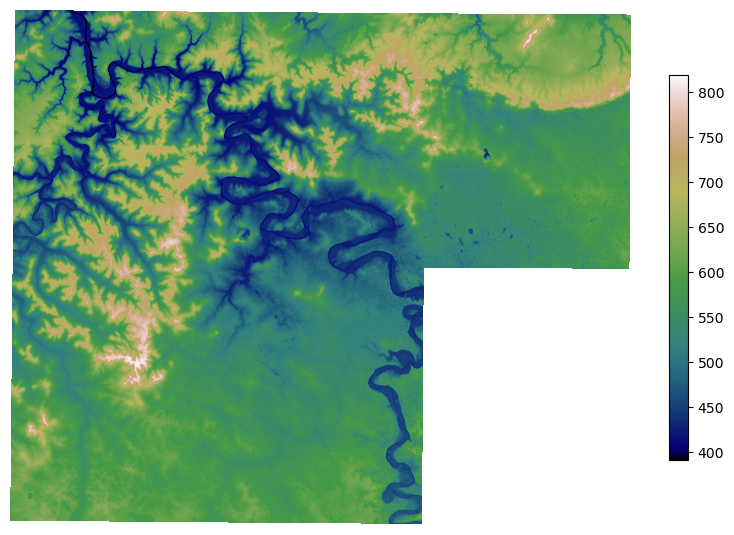

In [20]:
##### Warren County DEM

# custom helper function
plot_raster(warren_dem_path)

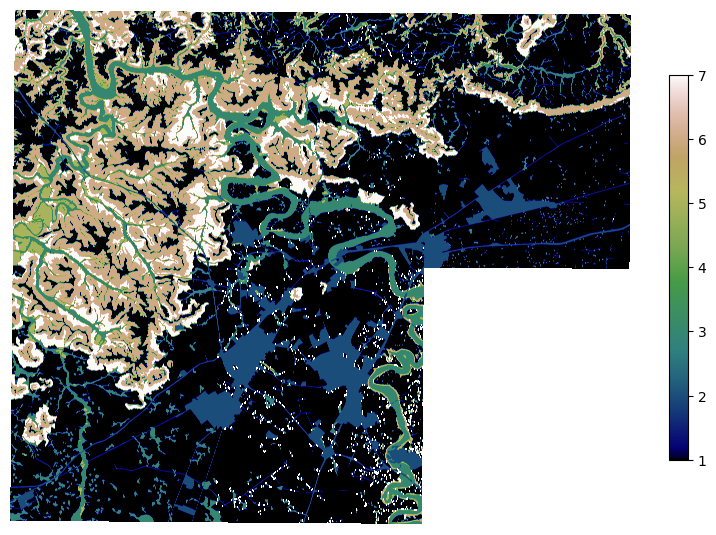

In [21]:
##### Warren County geology

# custom helper function
plot_raster(warren_geo_path)

### Hardin County

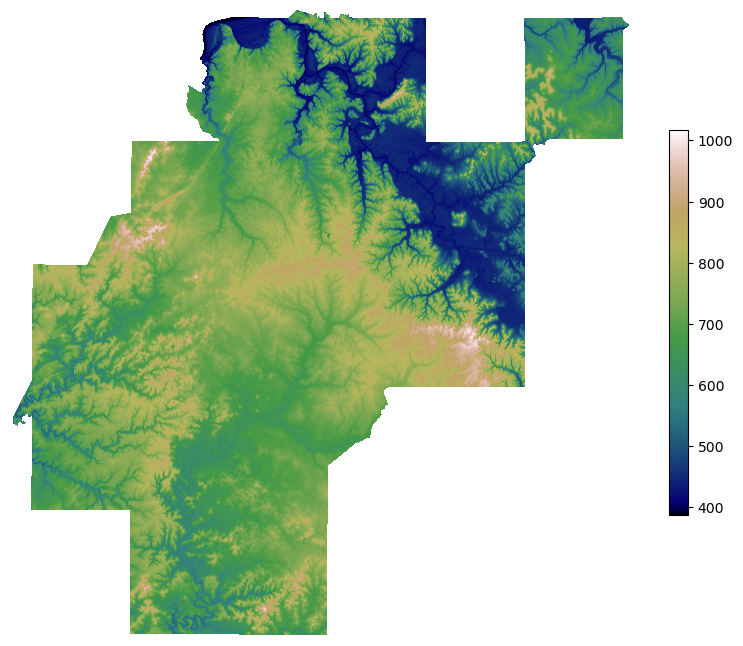

In [22]:
##### Hardin County DEM

# custom helper function
plot_raster(hardin_dem_path)

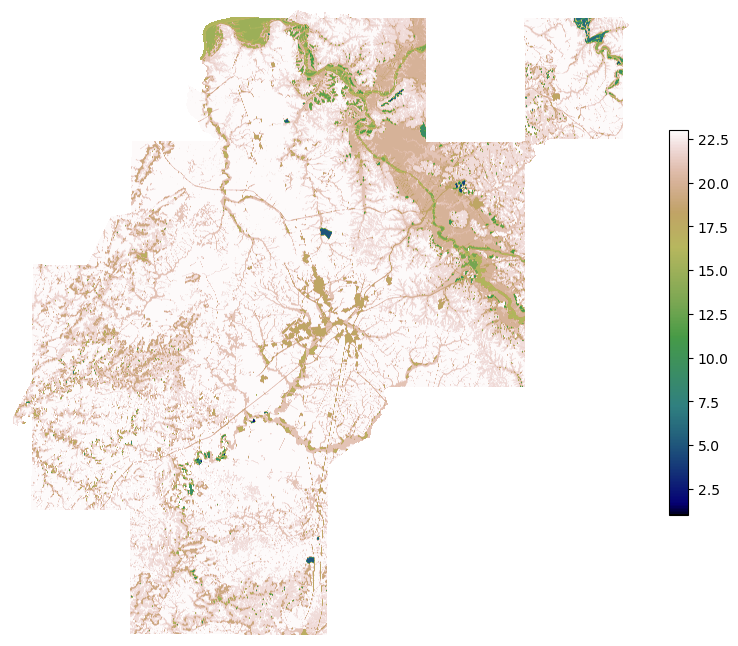

In [23]:
##### Hardin County geology

# custom helper function
plot_raster(hardin_geo_path)

## Summary Statistics

### Warren County

In [3]:
##### mean and standad deviations...

# dem
print('Warren County DEM')
raster_stats(warren_dem_path)

# geologic map
print('\nWarren County Geologic Map')
raster_stats(warren_geo_path)

Warren County DEM
Min:  391.63446
Max:  818.611
Mean:  567.2880256684999
Standard Deviation:  72.83225695564018
No Data value (not included in stats):  3.3999999521443642e+38
Raster width (pixels):  22037
Raster height (pixels):  18323
Raster resolution:  (5.0, 5.0)
Raster geographic units:  US survey foot

Warren County Geologic Map
Min:  1
Max:  7
Mean:  2.613421697637056
Standard Deviation:  2.240704397366446
No Data value (not included in stats):  0.0
Raster width (pixels):  22037
Raster height (pixels):  18323
Raster resolution:  (5.0, 5.0)
Raster geographic units:  US survey foot


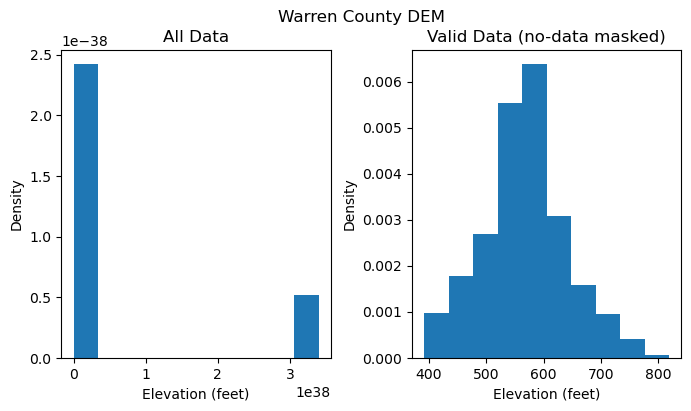

In [12]:
##### plot histograms of DEM...

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
plt.subplots_adjust(wspace=0.3)

with rasterio.open(warren_dem_path) as dem:

    all_data = dem.read(1)
    masked_data = dem.read(1, masked=True)
    
    ax[0].hist(all_data.flatten(), density=True)
    ax[0].set_title('All Data')
    ax[1].hist(masked_data.flatten(), density=True)
    ax[1].set_title('Valid Data (no-data masked)')

    for idx in range(len(ax)):
        ax[idx].set_xlabel('Elevation (feet)')
        ax[idx].set_ylabel('Density')

    plt.suptitle('Warren County DEM')
    plt.show()



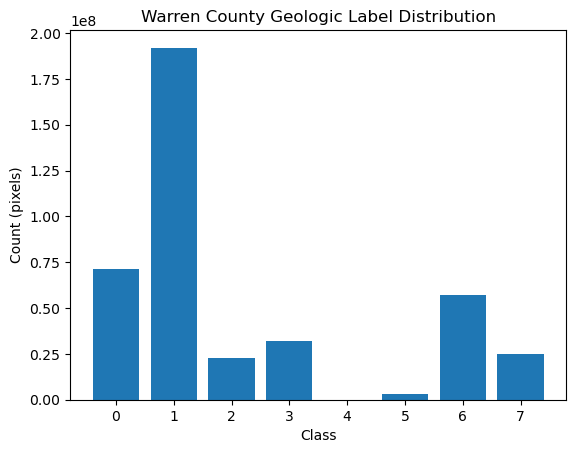

In [19]:
##### Plot Class Distributions of Geologic Map

with rasterio.open(warren_geo_path) as geo:
    
    labels = geo.read(1)

    unique_labels, counts = np.unique(labels, return_counts=True)

    class_distribution = dict(zip(unique_labels, counts))

    plt.bar(x=range(len(class_distribution)), 
            height=list(class_distribution.values()), 
            tick_label=list(class_distribution.keys()), 
            align='center')

    plt.title('Warren County Geologic Label Distribution')
    plt.xlabel('Class')
    plt.ylabel('Count (pixels)')
    plt.show()
    

In [17]:
##### Aggregated statistics of Geologic Map Unit by Area

input_shapefile_path = r'../data/warren/geo_warren.shp'

gdf = gpd.read_file(input_shapefile_path)

gdf['area'] = gdf['geometry'].area

gdf.groupby('Symbol')['area'].agg(['min', 'mean', 'max', 'sum'])

,min,mean,max,sum
Symbol,,,,
Qaf,5000.517979,3.628269e+04,2.354096e+05,1.596439e+06
Qal,666.697863,4.045241e+05,3.366692e+08,8.009577e+08
Qat,11635.476040,5.843957e+05,8.183115e+06,8.298419e+07
Qc,5499.879351,2.810480e+06,2.000917e+08,1.433345e+09
Qca,7566.248191,1.034241e+06,2.151729e+07,6.215790e+08
Qr,1584.779510,9.265509e+06,1.237670e+09,4.799534e+09
af1,2722.502572,1.679108e+06,3.492777e+08,5.658594e+08


### Hardin County

In [4]:
##### mean and standad deviations...

# dem
print('Hardin County DEM')
raster_stats(hardin_dem_path)

# geologic map
print('\nHardin County Geologic Map')
raster_stats(hardin_geo_path)

Hardin County DEM
Min:  387.0
Max:  1016.63293
Mean:  688.1086122612294
Standard Deviation:  115.78934078960565
No Data value (not included in stats):  3.3999999521443642e+38
Raster width (pixels):  45602
Raster height (pixels):  46081
Raster resolution:  (5.0, 5.0)
Raster geographic units:  US survey foot

Hardin County Geologic Map
Min:  1
Max:  23
Mean:  21.85251521967847
Standard Deviation:  2.2332024738003273
No Data value (not included in stats):  0.0
Raster width (pixels):  45602
Raster height (pixels):  46081
Raster resolution:  (5.0, 5.0)
Raster geographic units:  US survey foot


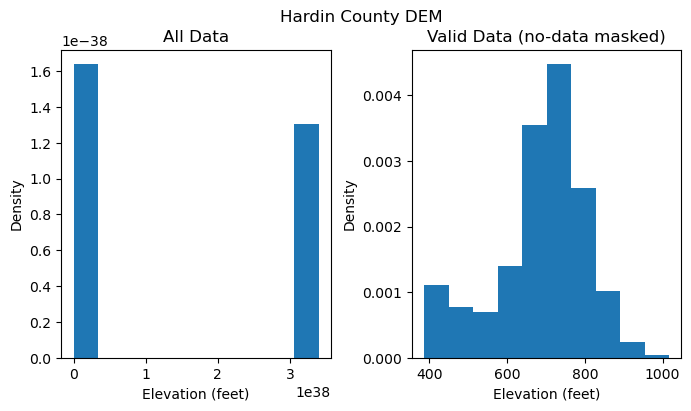

In [13]:
##### plot histograms of DEM...

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
plt.subplots_adjust(wspace=0.3)

with rasterio.open(hardin_dem_path) as dem:

    all_data = dem.read(1)
    masked_data = dem.read(1, masked=True)
    
    ax[0].hist(all_data.flatten(), density=True)
    ax[0].set_title('All Data')
    ax[1].hist(masked_data.flatten(), density=True)
    ax[1].set_title('Valid Data (no-data masked)')

    for idx in range(len(ax)):
        ax[idx].set_xlabel('Elevation (feet)')
        ax[idx].set_ylabel('Density')

    plt.suptitle('Hardin County DEM')
    plt.show()

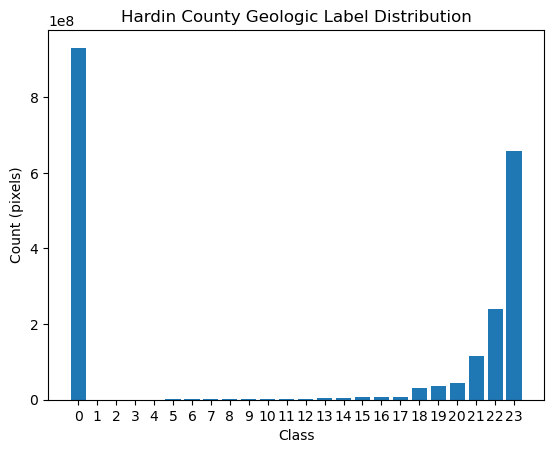

In [14]:
##### Plot Class Distributions of Geologic Map

with rasterio.open(hardin_geo_path) as geo:
    
    labels = geo.read(1)

    unique_labels, counts = np.unique(labels, return_counts=True)

    class_distribution = dict(zip(unique_labels, counts))

    plt.bar(x=range(len(class_distribution)), 
            height=list(class_distribution.values()), 
            tick_label=list(class_distribution.keys()), 
            align='center')

    plt.title('Hardin County Geologic Label Distribution')
    plt.xlabel('Class')
    plt.ylabel('Count (pixels)')
    plt.show()

In [16]:
##### Aggregated statistics of Geologic Map Unit by Area

input_shapefile_path = r'../data/hardin/geo_hardin.shp'

gdf = gpd.read_file(input_shapefile_path)

gdf['area'] = gdf['geometry'].area

gdf.groupby('Symbol')['area'].agg(['min', 'mean', 'max', 'sum'])

,min,mean,max,sum
Symbol,,,,
PZ,9387.272961,6.076968e+04,1.737694e+06,4.861575e+07
Qaf,4834.929184,8.611194e+04,2.351867e+06,5.821167e+07
Qafp,24989.934322,1.089563e+06,1.108811e+08,1.786883e+08
Qal,455.125364,4.647699e+05,4.265081e+08,2.868095e+09
Qalo,29653.365177,6.347237e+05,1.706749e+06,8.251408e+06
Qapc,34055.328317,3.303952e+05,1.432016e+06,4.625533e+06
Qat,5294.141038,3.520306e+05,4.457078e+06,1.957290e+08
Qat1,7863.098333,4.648850e+05,9.874663e+06,8.600372e+07
Qat2,5929.943735,3.242910e+05,4.894135e+06,9.761159e+07
